# CAMPUS RECRUITMENT PREDICTION USING MACHINE LEARNING - MBA Students
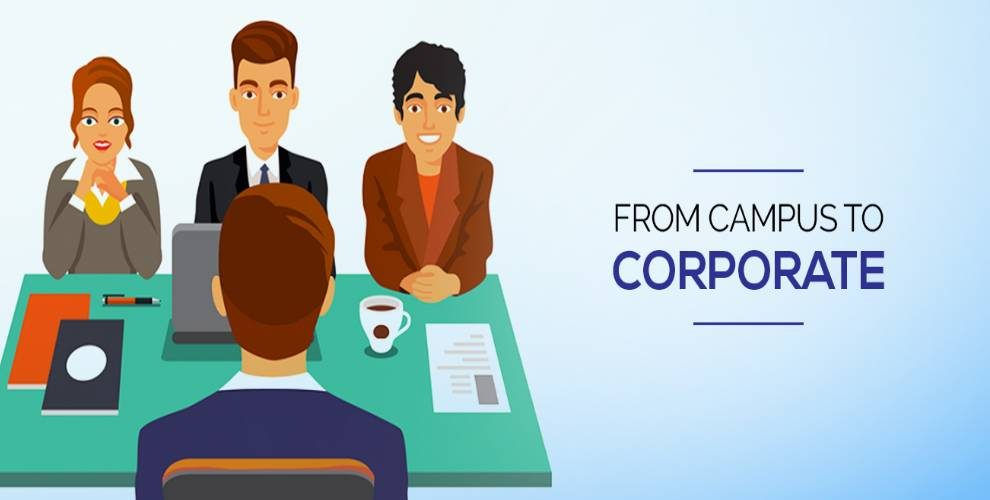

**1. DATA SELECTION**

**Student Name: Devi Samyuktha Chitturi** <br>
**Student Number: c0901961** <br>

**DATASET OVERVIEW:** In this project we are going to utilize the **Campus Recruitment** Dataset from Kaggle which consisit of various features which might influence the Placement of Student in Jobs. The "Campus Placement Prediction" dataset encapsulates a comprehensive array of attributes aimed at predicting the outcome of candidate selection during campus placement processes. This dataset offers valuable insights into the factors influencing a candidate's success in securing placement opportunities within various academic institutions and corporate entities.

**DATA LINK:** https://www.kaggle.com/c/ml-with-python-course-project/data

**FEATURES:**

1. Gender (Categorical): Represents the gender identity of the candidate participating in the placement process.
2. Secondary Education Percentage (Numerical): Denotes the percentage score obtained by candidates in their secondary education.
3. Secondary Education Board (Categorical): Indicates the educational board associated with the candidate's secondary education.
4. Higher Secondary Education Percentage (Numerical): Reflects the percentage score attained by candidates in their higher secondary education.
5. Higher Secondary Education Board (Categorical): Identifies the educational board governing the candidate's higher secondary education.
6. Higher Secondary Education Stream (Categorical): Specifies the academic stream pursued by candidates during their higher secondary education.
7. Undergraduate Degree Percentage (Numerical): Signifies the percentage score achieved by candidates in their undergraduate degree program.
8. Undergraduate Degree Type (Categorical): Characterizes the type of undergraduate degree pursued by candidates.
9. Work Experience (Categorical): Indicates whether candidates possess prior work experience.
10. Employability Test Percentage (Numerical): Represents the percentage score obtained by candidates in employability tests.
11. MBA Percentage (Numerical): Indicates the percentage score attained by candidates in their Master of Business Administration (MBA) program.
12. Specialization (Categorical): Specifies the specialization area of candidates in their MBA program.
13. Placement Status (Categorical): Serves as the target variable, indicating whether candidates were placed or not during the campus placement process.

**OBJECTIVE:**

The primary objective of this dataset is to facilitate the development of robust predictive models that accurately discern the likelihood of candidate selection during campus placements. By leveraging a diverse array of candidate attributes, encompassing academic performance, gender, work experience, and specialization areas, this dataset enables the exploration of underlying patterns and predictive relationships that significantly influence placement outcomes.

Predict Class label (y):- status

**UTILIZATION:**

Researchers, educators, and recruitment professionals can leverage this dataset to gain profound insights into the dynamics of campus placement processes. By harnessing advanced machine learning techniques, stakeholders can develop predictive models that effectively forecast candidate selection probabilities, thereby optimizing placement strategies and enhancing the efficiency of recruitment endeavors.

**ETHICAL CONSIDERATION:**

It is imperative to uphold ethical standards and ensure the responsible use of this dataset. Respect for candidate privacy and confidentiality must be maintained throughout the analysis process. Additionally, measures should be implemented to mitigate bias and promote fairness in decision-making processes related to placement outcomes.





In [86]:
# Load the necessary libraries according to the requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**DATA CLEANING & EXPLORATORY DATA ANALYSIS**

In [87]:
# load the data
df = pd.read_csv('train.csv')

In [88]:
# Print the first five rows of the loaded dataframe
df.head(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [89]:
# Identify the shape of the loaded dataframe
df.shape

(215, 15)

In [90]:
# Print a concise summary of the pandas dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


In [91]:
# Generate descriptive analytics for the numerical features in the dataset
df.describe()

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,0.353488,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,0.479168,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,0.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,0.000000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,0.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,1.000000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,1.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [92]:
 # Checking for null values
df.isnull().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


**Analysis:** There are no null values in any of the columns except for the Salary column, which contains records with null values for students who are not placed.

In [93]:
# Checking or duplicate records
df.duplicated().sum()

0

**Analysis:** The dataset does not contain any duplicate records.

In [94]:
# Count of no. of students placed and not placed
df['status'].value_counts()

,count
status,
Placed,148
Not Placed,67


**Analysis:** This indicates that a larger number of students have been placed. However, there is an imbalance in the class distribution, which can be addressed using oversampling or undersampling techniques.

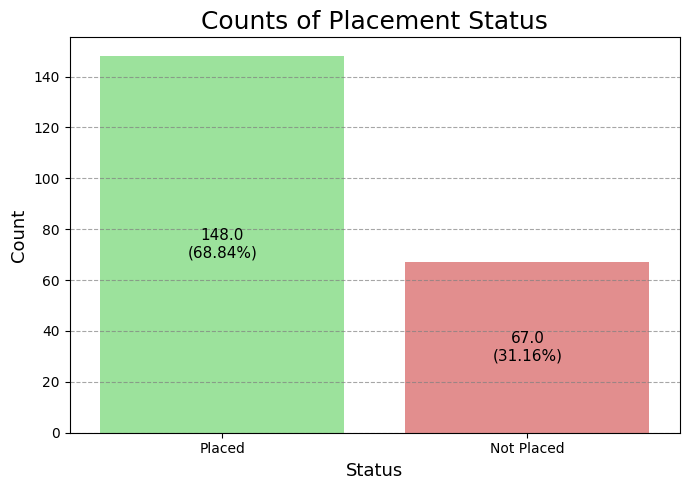

In [95]:
# Set figure size
plt.figure(figsize=(7, 5))

# Use the `palette` argument to set colors for the bars
ax = sns.countplot(x='status', data=df, palette=['lightgreen', 'lightcoral'])

# Add gridlines
plt.grid(True, which='both', axis='y', linestyle='--', color='gray', alpha=0.7)

# Set titles and labels
plt.title('Counts of Placement Status', fontsize=18)
plt.xlabel('Status', fontsize=13)
plt.ylabel('Count', fontsize=13)

# Calculate the total number of entries
total = len(df['status'])

# Display the count and percentage inside each bar
for p in ax.patches:
    count = p.get_height()  # Get count for the bar
    percentage = f'{100 * count / total:.2f}%'  # Calculate percentage
    ax.annotate(f'{count}\n({percentage})',
                (p.get_x() + p.get_width() / 2., count / 2),  # Adjust position to be inside the bar
                ha = 'center', va = 'center',  # Center the text horizontally and vertically
                fontsize=11, color='black')

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

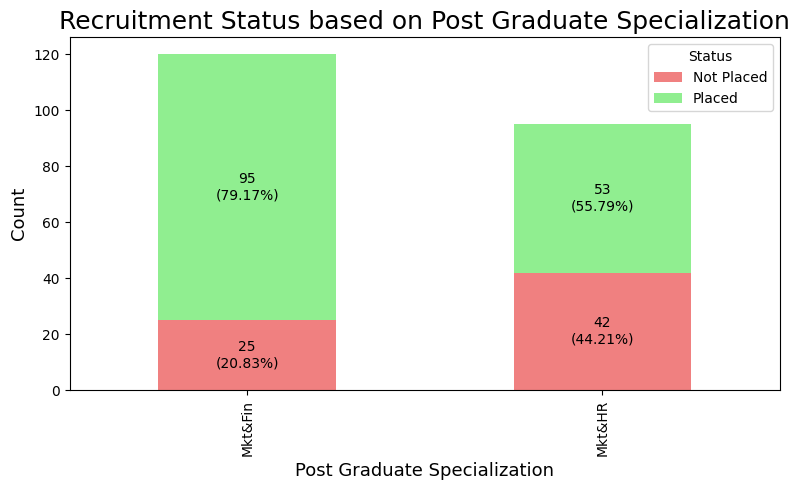

In [96]:
# Create a new figure
plt.figure(figsize=(8, 5))

# Pivot the data to create counts for each combination of 'specialisation' and 'status'
status_counts = df.groupby(['specialisation', 'status']).size().unstack()

# Plot a stacked bar chart
ax = status_counts.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'], figsize=(8, 5))

# Set titles and labels
plt.title('Recruitment Status based on Post Graduate Specialization', fontsize=18)
plt.xlabel('Post Graduate Specialization', fontsize=13)
plt.ylabel('Count', fontsize=13)

# Set legend
plt.legend(title='Status')

# Display the counts and percentages on the bars
for container in ax.containers:
    # Display the count and percentage for each bar
    labels = [f'{int(v)}\n({v / sum(status_counts.loc[idx]) * 100:.2f}%)'
              for idx, v in zip(status_counts.index, container.datavalues)]
    ax.bar_label(container, labels=labels, label_type='center')

# Show the plot
plt.tight_layout()
plt.show()

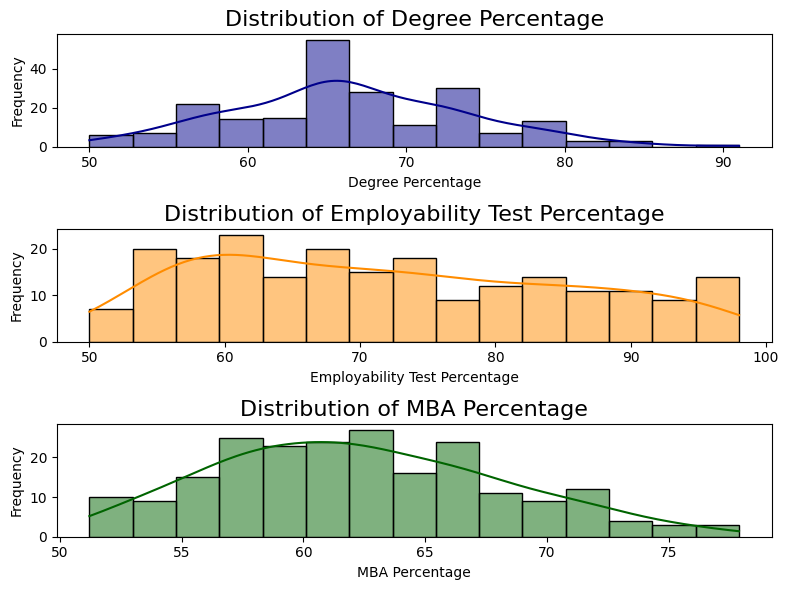

In [97]:
# Plot the distribution of degree percentage, employability test percentage, and MBA percentage on three histograms in the same figure
plt.figure(figsize=(8, 6))

# Degree percentage histogram
plt.subplot(3, 1, 1)
sns.histplot(df['degree_p'], bins=15, kde=True, color='darkblue', label='All')
plt.title('Distribution of Degree Percentage', fontsize=16)
plt.xlabel('Degree Percentage')
plt.ylabel('Frequency')

# MBA percentage histogram
plt.subplot(3, 1, 3)
sns.histplot(df['mba_p'], bins=15, kde=True, color='darkgreen', label='All')
plt.title('Distribution of MBA Percentage', fontsize=16)
plt.xlabel('MBA Percentage')
plt.ylabel('Frequency')

# Employability test percentage histogram
plt.subplot(3, 1, 2)
sns.histplot(df['etest_p'], bins=15, kde=True, color='darkorange', label='All')
plt.title('Distribution of Employability Test Percentage', fontsize=16)
plt.xlabel('Employability Test Percentage')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

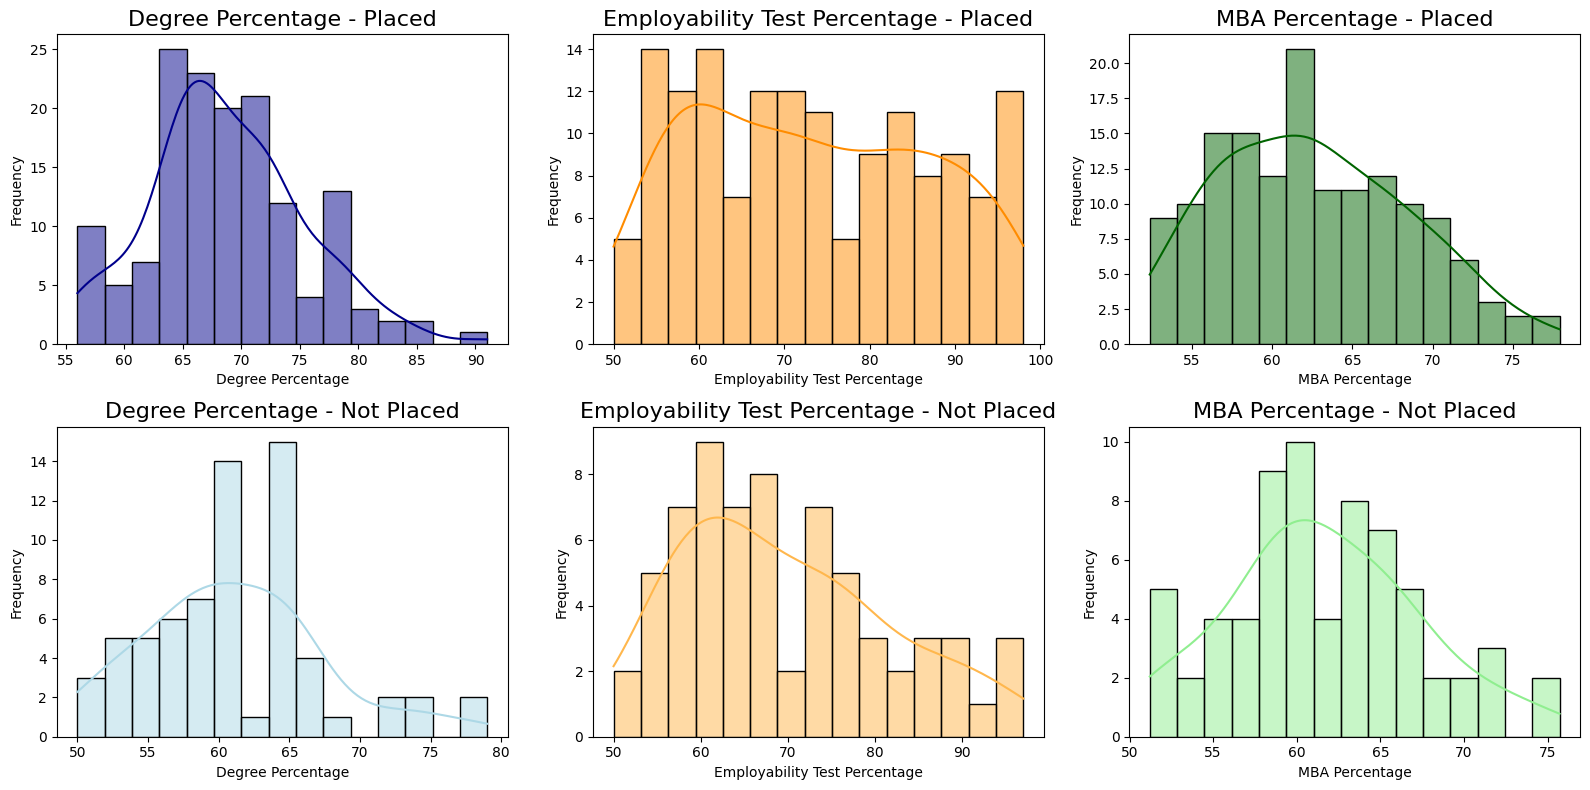

In [98]:
# Add separate column to the subplots and plot the same figures based on the placement status
plt.figure(figsize=(16, 8))

# Degree percentage histograms for Placed and Not Placed
plt.subplot(2, 3, 1)
sns.histplot(df[df['status'] == 'Placed']['degree_p'], bins=15, kde=True, color='darkblue')
plt.title('Degree Percentage - Placed', fontsize=16 )
plt.xlabel('Degree Percentage')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
sns.histplot(df[df['status'] == 'Not Placed']['degree_p'], bins=15, kde=True, color='lightblue')
plt.title('Degree Percentage - Not Placed', fontsize=16)
plt.xlabel('Degree Percentage')
plt.ylabel('Frequency')

# Employability test percentage histograms for Placed and Not Placed
plt.subplot(2, 3, 2)
sns.histplot(df[df['status'] == 'Placed']['etest_p'], bins=15, kde=True, color='darkorange')
plt.title('Employability Test Percentage - Placed', fontsize=16)
plt.xlabel('Employability Test Percentage')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
sns.histplot(df[df['status'] == 'Not Placed']['etest_p'], bins=15, kde=True, color='#FFB74D')
plt.title('Employability Test Percentage - Not Placed', fontsize=16)
plt.xlabel('Employability Test Percentage')
plt.ylabel('Frequency')

# MBA percentage histograms for Placed and Not Placed
plt.subplot(2, 3, 3)
sns.histplot(df[df['status'] == 'Placed']['mba_p'], bins=15, kde=True, color='darkgreen')
plt.title('MBA Percentage - Placed', fontsize=16)
plt.xlabel('MBA Percentage')
plt.ylabel('Frequency')

plt.subplot(2, 3, 6)
sns.histplot(df[df['status'] == 'Not Placed']['mba_p'], bins=15, kde=True, color='lightgreen')
plt.title('MBA Percentage - Not Placed', fontsize=16)
plt.xlabel('MBA Percentage')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

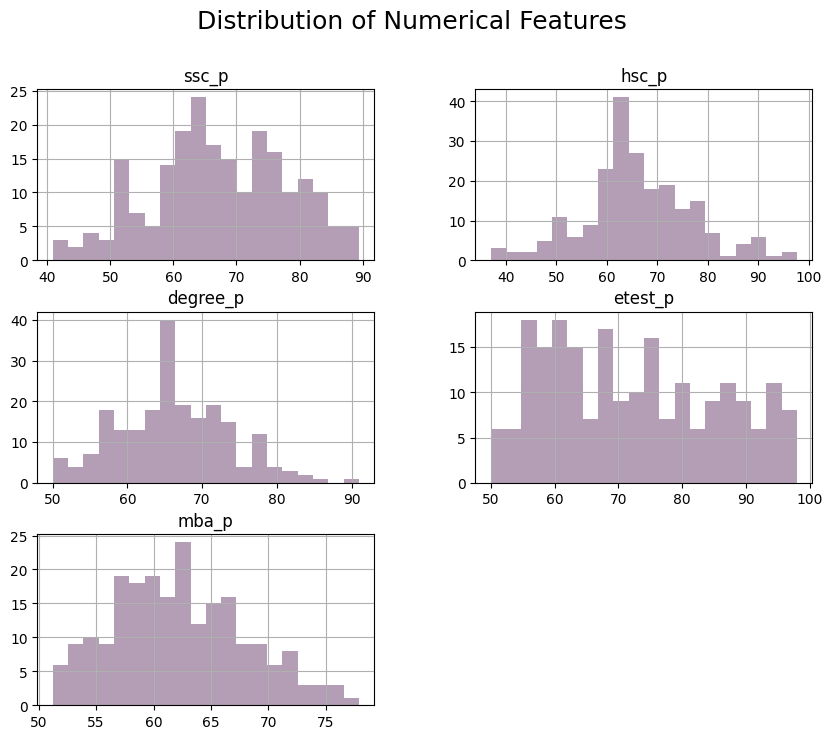

In [99]:
# Define the numerical features
numerical_features = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

# Create histograms
df[numerical_features].hist(figsize=(10, 8), bins=20, color=['#B39EB5'])

# Add a title
plt.suptitle('Distribution of Numerical Features', fontsize=18)

# Display the plot
plt.show()

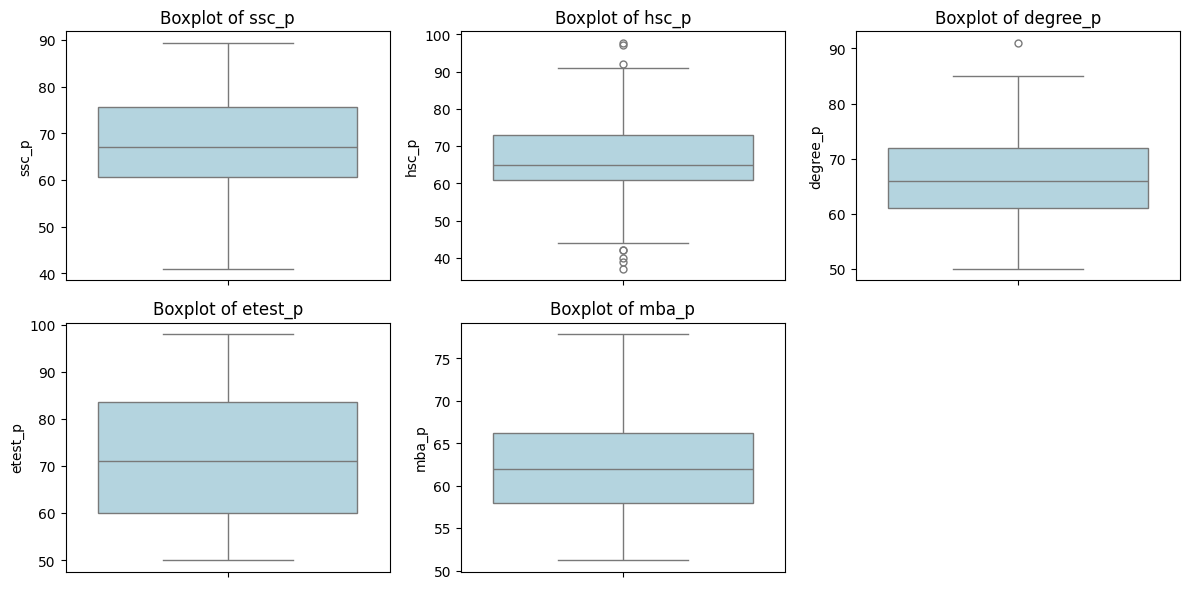

In [100]:
# Set up the figure for the boxplots
plt.figure(figsize=(12, 6))

# Create boxplots
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[feature], color='lightblue', fliersize=5)
    plt.title(f'Boxplot of {feature}')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

**Analysis:** There are few to no outliers present in any of the numerical features.

**2. DATA PREPROCESSING**

In [101]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Drop unnecessary columns from the DataFrame
df.drop(columns=['sl_no', 'salary'], inplace=True)

# Define features (X) and target variable (y)
X = df.drop(columns=['status'])
y = df['status'].map({'Placed': 1, 'Not Placed': 0})  # Encode target variable

# Specify the types of features
numerical_columns = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']  # Columns to scale
binary_columns = ['gender', 'ssc_b', 'hsc_b']   # Columns with binary values
categorical_columns = ['degree_t', 'specialisation', 'workex']  # Columns with multiple categories

# Optional: Print the feature and target variable shapes for verification
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (215, 12)
Target shape: (215,)


In [102]:
# Import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define numerical features transformation pipeline
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardizing numerical features
])

# Define binary categorical features transformation pipeline
binary_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='if_binary'))  # Encoding binary features to 0/1
])

# Define multi-class categorical features transformation pipeline
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))  # One-Hot Encoding for multi-class features, dropping the first category
])

# Combine all transformers into a single ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('numerical', numerical_transformer, numerical_columns),  # Apply numerical transformer to numerical_columns
    ('binary', binary_transformer, binary_columns),            # Apply binary transformer to binary_columns
    ('categorical', categorical_transformer, categorical_columns)  # Apply categorical transformer to categorical_columns
])

# Create a complete pipeline that includes preprocessing steps
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)  # Preprocessing step
])

In [103]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
X_train_tr = pipeline.fit_transform(X_train)

**HANDLING CLASS IMBALANCE**

In [104]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)  # initializing SMOTE

# applying SMOTE to training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_tr, y_train)

X_test_tr = pipeline.transform(X_test)  # transforming test data to avoid data leakage

**3&4. MODEL SELECTION & TRAINING**

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC  # Importing Support Vector Machine
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Dictionary with classification models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

In [106]:
# loop through all the models and train them
for model_name, model in models.items():
    # fit the model
    model.fit(X_train_smote, y_train_smote)

    # make predictions
    y_pred = model.predict(X_test_tr)

    # calculate evaluation metrics
    print(f"Model: {model_name}\n")
    print(f"Accuracy: {np.round(accuracy_score(y_test, y_pred), 4)}")
    print(f"Precision: {np.round(precision_score(y_test, y_pred), 4)}")
    print(f"Recall: {np.round(recall_score(y_test, y_pred), 4)}")
    print(f"F1 Score: {np.round(f1_score(y_test, y_pred), 4)}")

    cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['Actual Not Placed', 'Actual Placed'],
                         columns=['Predicted Not Placed', 'Predicted Placed'])
    print(f"Confusion Matrix:\n {cm_df}\n")

Model: Logistic Regression

Accuracy: 0.8372
Precision: 0.9
Recall: 0.871
F1 Score: 0.8852
Confusion Matrix:
                    Predicted Not Placed  Predicted Placed
Actual Not Placed                     9                 3
Actual Placed                         4                27

Model: Support Vector Machine

Accuracy: 0.8605
Precision: 0.9032
Recall: 0.9032
F1 Score: 0.9032
Confusion Matrix:
                    Predicted Not Placed  Predicted Placed
Actual Not Placed                     9                 3
Actual Placed                         3                28

Model: Decision Tree

Accuracy: 0.814
Precision: 0.871
Recall: 0.871
F1 Score: 0.871
Confusion Matrix:
                    Predicted Not Placed  Predicted Placed
Actual Not Placed                     8                 4
Actual Placed                         4                27

Model: Random Forest

Accuracy: 0.7674
Precision: 0.8182
Recall: 0.871
F1 Score: 0.8438
Confusion Matrix:
                    Predicted Not Plac

**MODEL COMPARISION:** Based on the evaluation metrics, Support Vector Machine (SVM) emerges as the best model, achieving the highest accuracy, precision, recall, and F1 score. Its superior performance indicates a strong ability to differentiate between placed and not placed students effectively.

Logistic Regression is a close second, with slightly lower metrics but still demonstrating solid performance.

Decision Trees, while reasonable, did not match the performance of SVM or Logistic Regression, making them less favorable for this classification task.

Random Forest was eliminated from consideration due to its notably lower accuracy and precision compared to the other models, despite having an acceptable recall. This suggests that while it could identify placed students, it was less reliable overall in making accurate predictions, thus not suitable for this particular application.

**5. MODEL EVALUATION**

**HYPERPARAMETER TUNING**

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import pandas as pd

# Define the models without Random Forest
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

# Define the parameter grid for each model (excluding Random Forest)
param_grids = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
        'solver': ['lbfgs', 'liblinear']  # Solvers to consider
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],  # Different kernels to try
        'gamma': ['scale', 'auto']  # Kernel coefficient for ‘rbf’
    },
    'Decision Tree': {
        'max_depth': [None, 5, 10, 20, 30],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
        'min_samples_leaf': [1, 2, 4]  # Minimum samples required to be at a leaf node
    }
}

# Initialize a dictionary to store the best models
best_models = {}

# Loop through all the models for hyperparameter tuning
for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name],
                               scoring='f1', cv=5, n_jobs=-1, verbose=1)

    # Fit GridSearchCV
    grid_search.fit(X_train_smote, y_train_smote)

    # Store the best model
    best_models[model_name] = grid_search.best_estimator_

    # Print the best parameters and score
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best F1 score: {grid_search.best_score_:.4f}\n")

for model_name, model in best_models.items():
    # Make predictions
    y_pred = model.predict(X_test_tr)

    # Calculate evaluation metrics
    print(f"Model: {model_name}\n")
    print(f"Accuracy: {np.round(accuracy_score(y_test, y_pred), 4)}")
    print(f"Precision: {np.round(precision_score(y_test, y_pred), 4)}")
    print(f"Recall: {np.round(recall_score(y_test, y_pred), 4)}")
    print(f"F1 Score: {np.round(f1_score(y_test, y_pred), 4)}")

    cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['Actual Not Placed', 'Actual Placed'],
                         columns=['Predicted Not Placed', 'Predicted Placed'])
    print(f"Confusion Matrix:\n{cm_df}\n")

Tuning hyperparameters for Logistic Regression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}
Best F1 score: 0.8547

Tuning hyperparameters for Support Vector Machine...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for Support Vector Machine: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best F1 score: 0.8797

Tuning hyperparameters for Decision Tree...
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters for Decision Tree: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best F1 score: 0.8277

Model: Logistic Regression

Accuracy: 0.8372
Precision: 0.9
Recall: 0.871
F1 Score: 0.8852
Confusion Matrix:
                   Predicted Not Placed  Predicted Placed
Actual Not Placed                     9                 3
Actual Placed                         4                27

Model: Support Vector Machine

Accuracy: 0.8605
Precision

Model: Logistic Regression

Accuracy: 0.8372
Precision: 0.9
Recall: 0.871
F1 Score: 0.8852


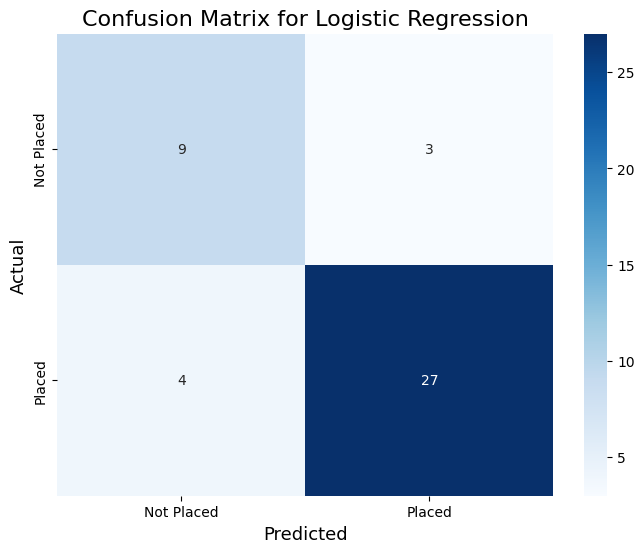

Model: Support Vector Machine

Accuracy: 0.8605
Precision: 0.9032
Recall: 0.9032
F1 Score: 0.9032


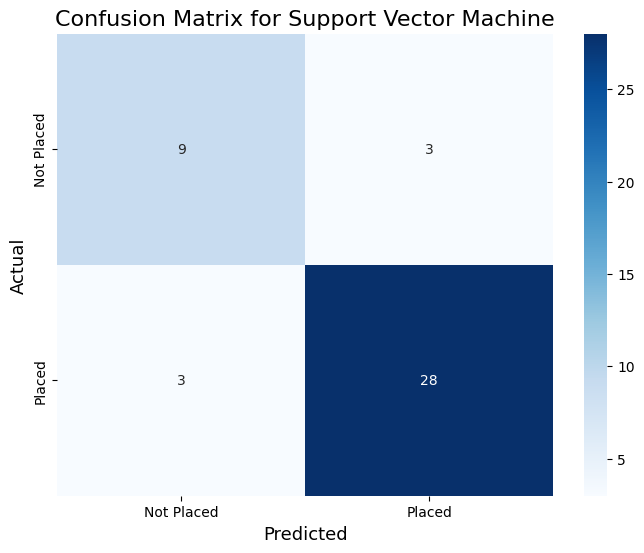

Model: Decision Tree

Accuracy: 0.7907
Precision: 0.8667
Recall: 0.8387
F1 Score: 0.8525


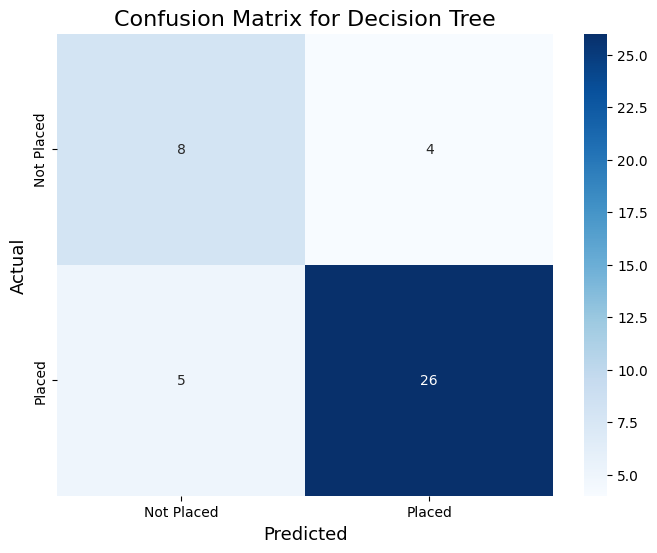

In [108]:
# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Placed', 'Placed'],
                yticklabels=['Not Placed', 'Placed'])
    plt.title(f'Confusion Matrix for {model_name}', fontsize=16)
    plt.xlabel('Predicted', fontsize=13)
    plt.ylabel('Actual', fontsize=13)
    plt.show()

# Loop through the best models and visualize the confusion matrix
for model_name, model in best_models.items():
    # Make predictions
    y_pred = model.predict(X_test_tr)

    # Calculate evaluation metrics
    print(f"Model: {model_name}\n")
    print(f"Accuracy: {np.round(accuracy_score(y_test, y_pred), 4)}")
    print(f"Precision: {np.round(precision_score(y_test, y_pred), 4)}")
    print(f"Recall: {np.round(recall_score(y_test, y_pred), 4)}")
    print(f"F1 Score: {np.round(f1_score(y_test, y_pred), 4)}")

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)

**Comparison Analysis:**
Logistic Regression and SVM maintained their performance metrics after tuning, indicating that their initial configurations were already close to optimal. However, the best F1 score for Logistic Regression slightly improved after tuning, reflecting better model robustness.

Support Vector Machine (SVM) performed consistently, achieving the highest F1 score among all models both before and after tuning. Its hyperparameter optimization did not significantly alter its effectiveness, confirming it as a reliable choice.

Decision Tree showed a decrease in performance metrics post-tuning. This may suggest that the tuned parameters led to overfitting or a less effective structure for the data compared to its initial configuration. The decline in accuracy, precision, recall, and F1 score indicates that the model became less effective at classifying students’ placement statuses.

**CROSS VALIDATION**

In [109]:
from sklearn.model_selection import cross_val_score

# Initialize a dictionary to store the cross-validation scores
cv_scores = {}

# Loop through all the models to evaluate with cross-validation
for model_name, model in best_models.items():
    # Perform cross-validation
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='f1')

    # Store the scores
    cv_scores[model_name] = scores

    # Print the results
    print(f"Model: {model_name}")
    print(f"Cross-Validation F1 Scores: {np.round(scores, 4)}")
    print(f"Mean F1 Score: {np.round(scores.mean(), 4)}")
    print(f"Standard Deviation: {np.round(scores.std(), 4)}\n")


Model: Logistic Regression
Cross-Validation F1 Scores: [0.84   0.9167 0.8261 0.8462 0.8444]
Mean F1 Score: 0.8547
Standard Deviation: 0.0318

Model: Support Vector Machine
Cross-Validation F1 Scores: [0.8936 0.913  0.8696 0.8333 0.8889]
Mean F1 Score: 0.8797
Standard Deviation: 0.027

Model: Decision Tree
Cross-Validation F1 Scores: [0.7727 0.8085 0.8163 0.8696 0.8   ]
Mean F1 Score: 0.8134
Standard Deviation: 0.0317



**MODEL SELECTION:**
The Support Vector Machine (SVM) is the best model among the three, given its superior accuracy, precision, recall, and F1 score. It also performed well during hyperparameter tuning and cross-validation. Highest accuracy (0.8605), the best F1 score (0.9032), and the best cross-validation mean F1 score (0.8797) among the three models.

**6. VOTING CLASSIFIER**

In [110]:
from sklearn.ensemble import VotingClassifier

# Define the individual models with their best hyperparameters
lr_best = best_models['Logistic Regression']  # Best Logistic Regression from GridSearchCV
svm_best = best_models['Support Vector Machine']  # Best SVM from GridSearchCV
dt_best = best_models['Decision Tree']  # Best Decision Tree from GridSearchCV

# Create the Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('logistic_regression', lr_best),
    ('support_vector_machine', svm_best),
    ('decision_tree', dt_best)],
    voting='hard'  # Use majority voting
)

# Fit the Voting Classifier on the training data
voting_clf.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_voting = voting_clf.predict(X_test_tr)

# Evaluate the Voting Classifier's performance
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting)
recall_voting = recall_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting)

# Confusion Matrix
cm_voting = confusion_matrix(y_test, y_pred_voting)
cm_voting_df = pd.DataFrame(cm_voting, index=['Actual Not Placed', 'Actual Placed'],
                             columns=['Predicted Not Placed', 'Predicted Placed'])

# Print evaluation metrics
print(f"Voting Classifier Performance:\n")
print(f"Accuracy: {np.round(accuracy_voting, 4)}")
print(f"Precision: {np.round(precision_voting, 4)}")
print(f"Recall: {np.round(recall_voting, 4)}")
print(f"F1 Score: {np.round(f1_voting, 4)}")
print(f"Confusion Matrix:\n{cm_voting_df}\n")

Voting Classifier Performance:

Accuracy: 0.8372
Precision: 0.9
Recall: 0.871
F1 Score: 0.8852
Confusion Matrix:
                   Predicted Not Placed  Predicted Placed
Actual Not Placed                     9                 3
Actual Placed                         4                27



**Analysis:** The Voting Classifier performed comparably to Logistic Regression, achieving the same accuracy of 83.72%. However, it outperformed the Logistic Regression model in terms of precision and F1 score, indicating a slightly better handling of positive class predictions.

The Support Vector Machine (SVM) had the highest performance metrics overall, with an accuracy of 86.05% and an F1 score of 0.9032. This suggests that SVM is the most effective model for this dataset, providing a more reliable prediction for both classes compared to the Voting Classifier.

In [111]:
import pickle

# Assuming 'voting_clf' is your Voting Classifier model
with open('voting_classifier_model.pkl', 'wb') as file:
    pickle.dump(voting_clf, file)